#Digging into the Titanic Kaggle datasets. 

##An exploratory view

###Basic Questions:

1. Who were the passengers?

2. What deck were the passengers on and how's that relate to their class booking?

3. Where the passengers come from?

4. Who was alone and who was with family?
    
###Deeper Analysis:

1. What factors helped them survive?

2. Did deck level matter?

3. Did having a family member matter?



In [7]:
import numpy as np
import pandas as pd
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [9]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


##**Question 1:**

Who were the passengers on the Titanic?

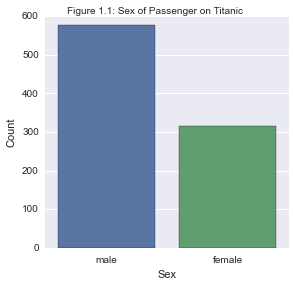

In [197]:
sns.factorplot(x='Sex', data = titanic_df, kind='count')
plt.suptitle('Figure 1.1: Gender of Passenger on Titanic')
plt.xlabel('Sex')
plt.ylabel('Count')

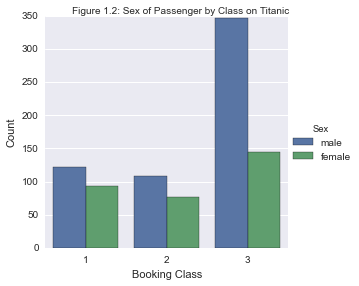

In [198]:
sns.factorplot(x='Pclass', data = titanic_df.sort('Pclass'), hue = 'Sex', kind='count')
plt.suptitle('Figure 1.2: Gender of Passenger by Class on Titanic')
plt.xlabel('Booking Class')
plt.ylabel('Count')

In [43]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age <  16:
        return 'child'
    else:
        return sex

In [44]:
titanic_df['person']= titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [45]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


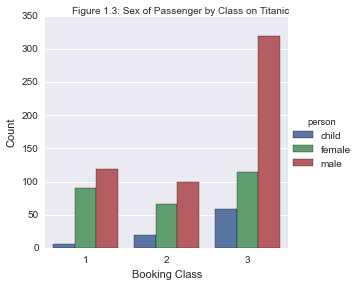

In [199]:
sns.factorplot('Pclass',data=titanic_df.sort('Pclass'), hue='person', kind = 'count')
plt.suptitle('Figure 1.3: Gender of Passenger by Class on Titanic')
plt.xlabel('Booking Class')
plt.ylabel('Count')

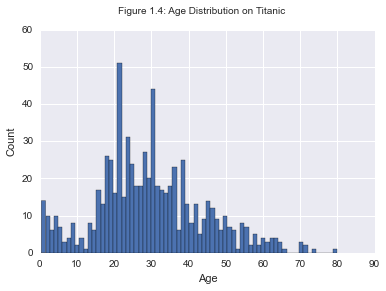

In [200]:
titanic_df['Age'].hist(bins=70)
plt.suptitle('Figure 1.4: Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')

In [57]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [58]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

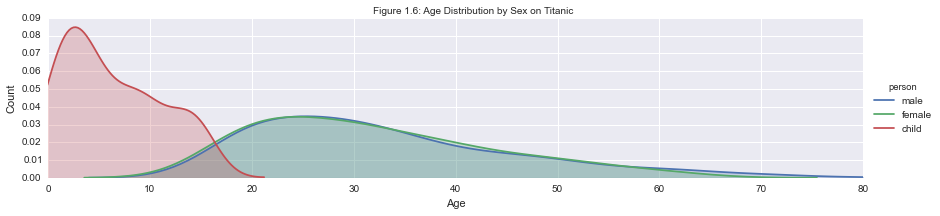

In [201]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

plt.suptitle('Figure 1.6: Age Distribution by Gender/Child on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')

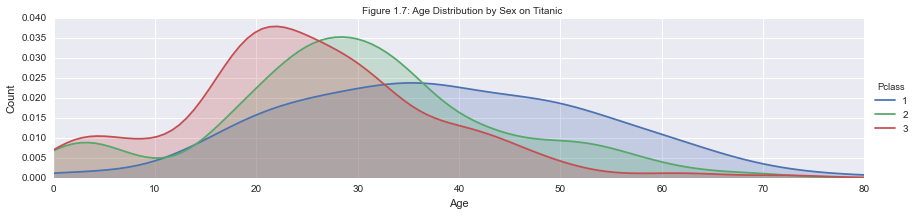

In [202]:
fig = sns.FacetGrid(titanic_df.sort('Pclass'), hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

plt.suptitle('Figure 1.7: Age Distribution by Gender/Child on Titanic')
plt.xlabel('Age')
plt.ylabel('Count')

##**Question 2:**

What deck were the passengers on and how's that relate to their class booking?

In [66]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [67]:
deck = titanic_df['Cabin'].dropna()

In [68]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

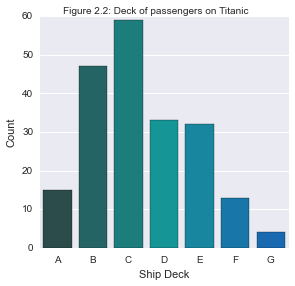

In [203]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df[cabin_df.Cabin != 'T']
cabin_df.head()
sns.factorplot('Cabin', data=cabin_df, palette = 'winter_d', kind ='count', order =['A','B','C','D','E','F','G'])
plt.suptitle('Figure 2.2: Deck of passengers on Titanic')
plt.xlabel('Ship Deck')
plt.ylabel('Count')

#Question 3:
Where the passengers come from?

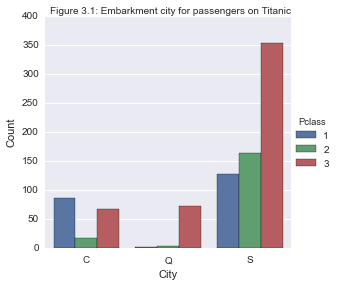

In [204]:
sns.factorplot('Embarked', data=titanic_df.sort('Pclass'), hue= 'Pclass', kind ='count', order = ['C','Q','S'])
plt.suptitle('Figure 3.1: Embarkment city for passengers on Titanic')
plt.xlabel('City')
plt.ylabel('Count')

##Discussion

Figure 3.1 shows which cities the Titanic passengers embarked from. The cities were C = Cherbourg; Q = Queenstown; and S = Southampton. The Titanic started her voyage from Southampton, and a majority of her passengers embarked here. She then sailed to Cherbourg and proceeded to pick up more first and third class passengers. The most noteworthy observation here is at her third port of call, Queenstown. Mostly third class passengers were picked up. Queenstown is in Ireland and most of these passengers were poor Irish migrating to the USA. 

#Question 4:
Who was alone and who was with family?

In [96]:
titanic_df['Alone']= titanic_df.SibSp + titanic_df.Parch

In [97]:
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [99]:
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [100]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


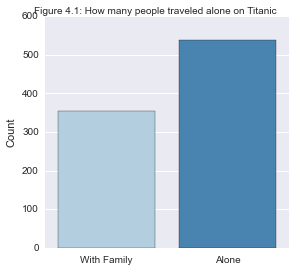

In [205]:
sns.factorplot('Alone', data=titanic_df, palette='Blues', kind='count')
plt.suptitle('Figure 4.1: How many people traveled alone on Titanic')
plt.xlabel('')
plt.ylabel('Count')

#Question 5:
What factors lead to people surviving more than others?

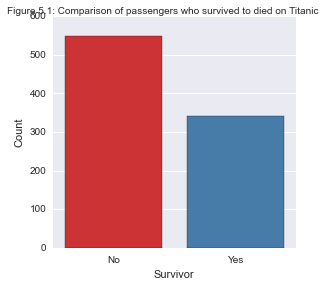

In [206]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No', 1:'Yes'})
sns.factorplot('Survivor', data=titanic_df, palette= 'Set1', kind = 'count')
plt.suptitle('Figure 5.1: Comparison of passengers who survived to died on Titanic')
plt.xlabel('Survivor')
plt.ylabel('Count')

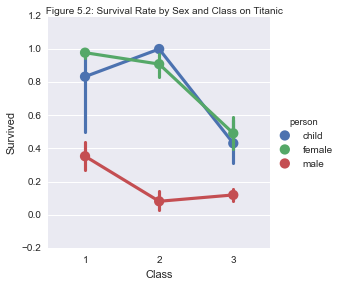

In [207]:
sns.factorplot('Pclass', 'Survived', hue='person', data=titanic_df.sort('Pclass'))
plt.suptitle(' Figure 5.2: Survival Rate by Sex and Class on Titanic')
plt.xlabel('Class')
plt.ylabel('Survived')

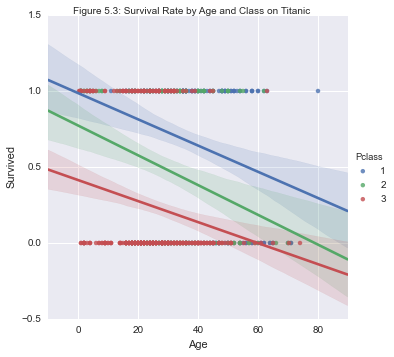

In [208]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df.sort('Pclass'))
plt.suptitle('Figure 5.3: Survival Rate by Age and Class on Titanic')
plt.xlabel('Age')
plt.ylabel('Survived')

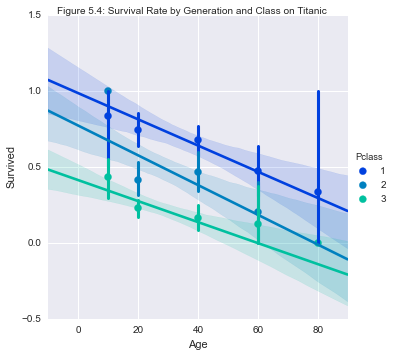

In [209]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = titanic_df.sort('Pclass'), palette = 'winter', x_bins = generations)
plt.suptitle('Figure 5.4: Survival Rate by Generation and Class on Titanic')
plt.xlabel('Age')
plt.ylabel('Survived')

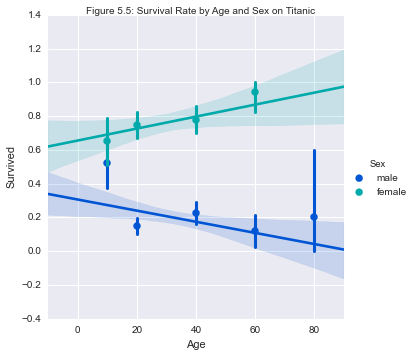

In [210]:
sns.lmplot('Age', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter', x_bins = generations)
plt.suptitle('Figure 5.5: Survival Rate by Age and Sex on Titanic')
plt.xlabel('Age')
plt.ylabel('Survived')

#Question 6:
Did deck have an effect on passneger survival rate and how does being a male on a deck affect that?

In [130]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,No


In [171]:
deck2 = titanic_df['Cabin']
deck2 = deck2.fillna('N')

levels2 = []

for level in deck2:
    levels2.append(level[0])

titanic_df['Deck'] =  levels2

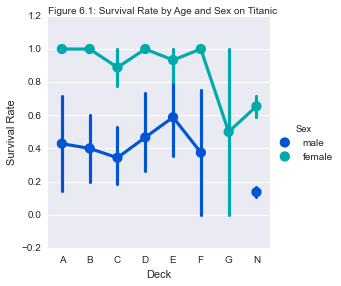

In [177]:
sns.factorplot('Deck', 'Survived', hue = 'Sex', data = titanic_df, palette = 'winter',order =['A','B','C','D','E','F','G','N'] )
plt.suptitle('Figure 6.1: Survival Rate by Age and Sex on Titanic')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')

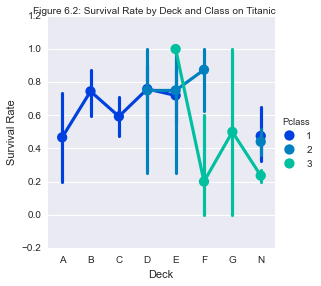

In [176]:
sns.factorplot('Deck', 'Survived', hue = 'Pclass', data = titanic_df.sort('Pclass'), palette = 'winter',order =['A','B','C','D','E','F','G','N'] )
plt.suptitle('Figure 6.2: Survival Rate by Deck and Class on Titanic')
plt.xlabel('Deck')
plt.ylabel('Survival Rate')

##Discusion:
Data for deck level per passenger is fairly incomplete. We only have 291 non null data points for passengers from a certain deck level. The data that was null is labeled as N in Figures 6.1 and 6.2. 

From the data in Figure 6.1, most women from decks F and above the survival rate was near 100% for available data. For men, interestingly, if you were deck C and above your survival rate was lower than the decks further below. Looking into this further, I grouped class with deck and we see the higher decks were first class (A-D), and third class was (E-G). This means if you were a first class male your survival rate was slightly lower than second of third class. From this "Gilded Age of Nobility", apparently first class men were more likely to follow a code of honor than their third class counterparts and were much more likely to follow "women and children first". 


#Question 7:
Did having a family member have an effect on survival rate?

In [178]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family,Yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,No,N


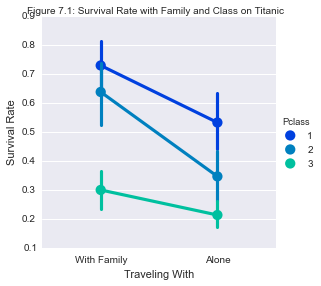

In [194]:
sns.factorplot('Alone', 'Survived', hue='Pclass', data = titanic_df.sort('Pclass'), palette = 'winter', )
plt.suptitle('Figure 7.1: Survival Rate with Family and Class on Titanic')
plt.xlabel('Traveling With')
plt.ylabel('Survival Rate')

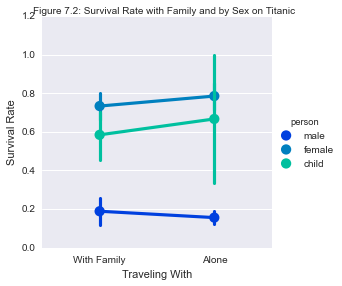

In [196]:
sns.factorplot('Alone', 'Survived', hue='person', data = titanic_df, palette = 'winter', )
plt.suptitle('Figure 7.2: Survival Rate with Family and by Sex on Titanic')
plt.xlabel('Traveling With')
plt.ylabel('Survival Rate')

##Discusion:

So were you more likely to survive if you were traveling with family? Well the short answer is yes. In figure 7.1,I plotted the survival rate of people traveling alone to people traveling with a family member by class and it is a pretty clear yes. For first and second class, if you were traveling along your survival rate drops pretty significantly (1st class from ~0.7 to ~0.55 and 2nd class from ~0.65 to ~0.35). Third class already had a low survival rate of 0.3 but it dropped to 0.2 if you were traveling alone. 

I wanted to check it out a little bit more so I investigated whether traveling with family and your sex mattered. As suspected, men had a very low survival rate. But the most interesting trend was for women and children. If you were alone and a female or child you were more likely to survive than if you were with your family. Apparently on the Titanic if you were with your family and a female or child your family held back your survival rate. This would be interesting to look at a bit more indepth. 